# Entropy

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme='onedork', figsize=(15, 9))

In [3]:
data = pd.read_csv('../data/lrcx_2022-1-1_2023-06-1_1h.csv', parse_dates=True, index_col=0)
data

,Open,High,Low,Close,Volume
Datetime,,,,,
2022-01-03 09:30:00-05:00,721.130005,731.059875,711.830017,721.275024,240660
2022-01-03 10:30:00-05:00,721.265015,722.219971,716.130005,718.112488,114249
2022-01-03 11:30:00-05:00,718.229980,721.174988,716.830017,720.200012,82818
2022-01-03 12:30:00-05:00,720.179993,720.799988,718.239990,718.821899,80495
2022-01-03 13:30:00-05:00,718.320984,723.260010,718.320984,722.974976,59261
...,...,...,...,...,...
2023-05-31 11:30:00-04:00,618.880005,622.960022,618.099976,620.500122,80556
2023-05-31 12:30:00-04:00,621.030029,622.664978,619.710022,622.609985,104813
2023-05-31 13:30:00-04:00,622.479980,624.710022,621.724976,623.099976,106904


In [9]:
batch = data[['Close', 'Volume']].iloc[:30]
close_mean = batch['Close'].mean()
volume_mean = batch['Volume'].mean()

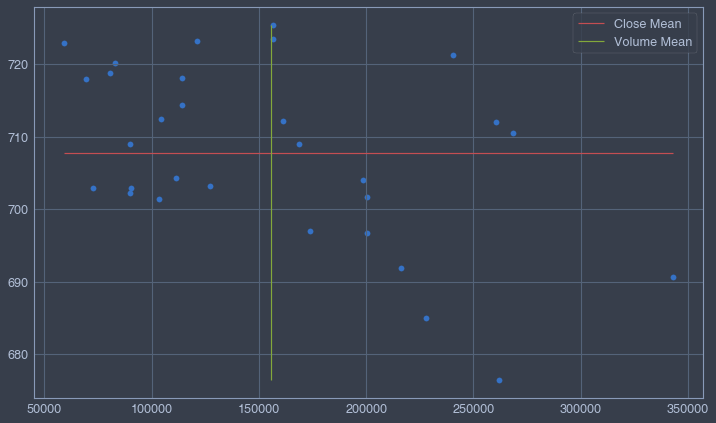

In [10]:
plt.hlines(close_mean,
           batch['Volume'].min(),
           batch['Volume'].max(),
           colors='r',
           label='Close Mean')
plt.vlines(volume_mean,
           batch['Close'].min(),
           batch['Close'].max(),
           colors='g',
           label='Volume Mean')
plt.scatter(batch['Volume'], batch['Close'])
plt.legend()
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))

ax1.scatter(batch['Volume'], batch['Close'], label='Volume/Close')
ax1.set_xlabel('Volume')
ax1.set_ylabel('Close')
ax1.set_title('Volume and Close')
ax1.legend()

ax2.scatter(bk_df[bk_df['Type'] == 'Buy']['Last'], bk_df[bk_df['Type'] == 'Buy']['Volume'], label='Volume/Buy', c='g')
ax1.set_ylim(0, 1700)
ax2.set_xlabel('BUY')
ax2.set_ylabel('VOLUME')
ax2.set_title('BK: Volume of Buy')
ax2.legend()

Text(0.5, 1.0, 'Close batch(30) | Volume batch(30)')

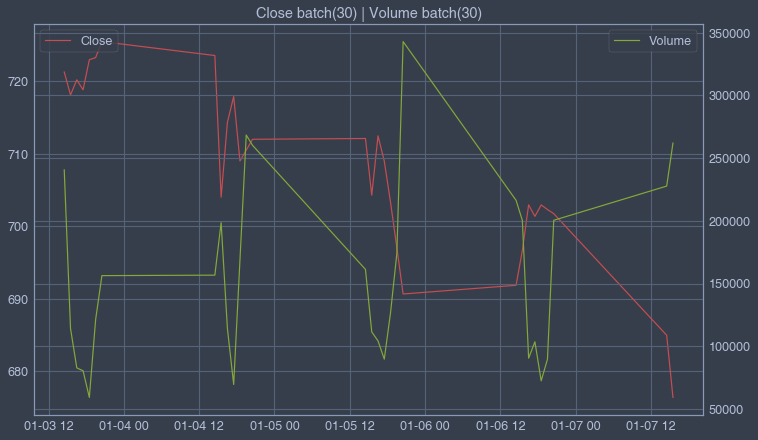

In [49]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(batch['Close'], color='r', label='Close')
ax1.plot(batch['Volume'], color='g', label='Volume')
ax.legend(loc='upper left')
ax1.legend(loc='upper right')
ax.set_title('Close batch(30) | Volume batch(30)')

Text(0.5, 1.0, 'Close 30 mean | Volume 30 mean')

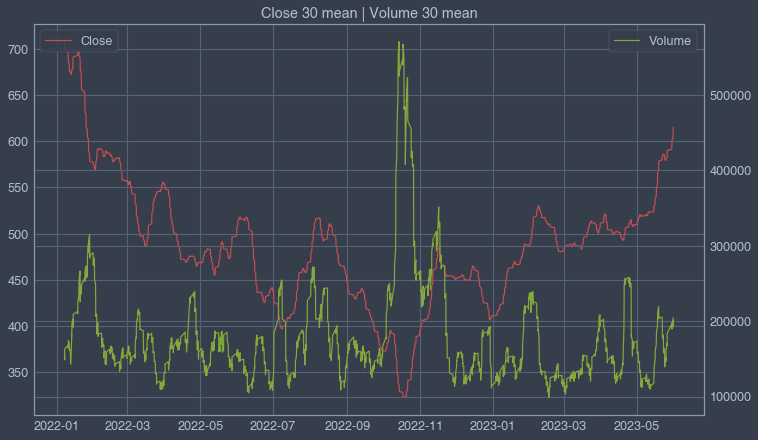

In [50]:
close_30_mean = data.rolling(30).mean().dropna()['Close']
volume_30_mean = data.rolling(30).mean().dropna()['Volume']

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax.plot(close_30_mean, color='r', label='Close')
ax1.plot(volume_30_mean, color='g', label='Volume')
ax.legend(loc='upper left')
ax1.legend(loc='upper right')
ax.set_title('Close 30 mean | Volume 30 mean')